In [148]:
#Ayyub Jose
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

## Business problem description

Given the Drug dataset with pateint parameters like Sex, Drug Type etc, we want to use SVM to perform a classification. We will use the model to classify them and predict the Drugs

In [149]:
#Load Dataset
df = pd.read_csv('./drug200.csv')
alabs = df.Drug.unique()
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Feature Engineering and Exploratory data analysis

<h1>Summary</h1>

The data set contains 200 rows with no missing or duplicated rows
Our target column is the drug column and our predictor columsn are Age , Sex , BP , Cholestorol and Na to Potassium Ration.
Our data is a mix of categorical and numerican data.

In the data set the Age column has ages ranging from 15 to 74. 52% of the pateints are male and 48% Fenale. 

38% patients have high blood pressure, with 32% bieng low and 30% being normal.
\


In [115]:
# import sweetviz library
import sweetviz as sv
# analyzing the drug study dataset
drug_study_report = sv.analyze(df)
#Default arguments will generate to “Drug_Study.html’’’
drug_study_report.show_html('Drug_Study.html')


Report Drug_Study.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [150]:
pd.crosstab(df['Cholesterol'],df['BP'])

BP,HIGH,LOW,NORMAL
Cholesterol,,,
HIGH,35,31,37
NORMAL,42,33,22


In [151]:
pd.crosstab(df['Cholesterol'],df['Drug'])

Drug,drugA,drugB,drugC,drugX,drugY
Cholesterol,,,,,
HIGH,12,8,16,20,47
NORMAL,11,8,0,34,44


In [152]:
pd.crosstab(df['Sex'],df['Drug'])

Drug,drugA,drugB,drugC,drugX,drugY
Sex,,,,,
F,9,6,7,27,47
M,14,10,9,27,44


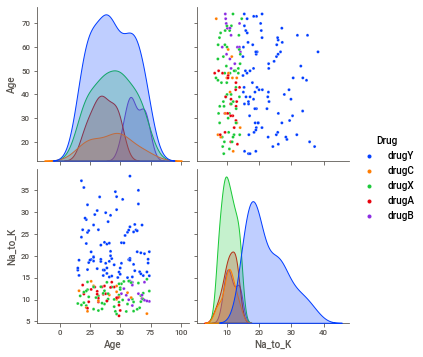

In [153]:
sns.pairplot(df, hue="Drug",palette="bright")

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

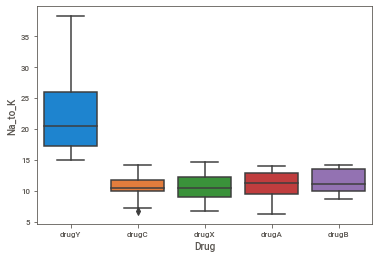

In [154]:
sns.boxplot(x = 'Drug', y = 'Na_to_K', data = df)

<b>Understanding the pairplot</b>

Using the pairplot we can visuilize how closely clustered our drugs are.
From the charts we can see that drugY has clear seperation when refrencing age against Na_to _K.
We can see there is some level of seperating depending on your age. drugC tends to be given to patrinds under 20 and drugY given to all ages

C:\Users\toyin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

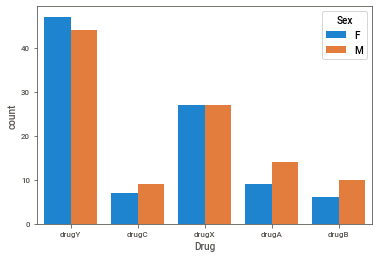

In [155]:
sns.countplot(df['Drug'], hue='Sex', data = df)

DrugY is the most used drug having an almost even distribution between males and females

## Pre-Processing

In [156]:
Sex_mapping = {"M": 0, "F": 1 }
df['Sex'] = df['Sex'].map(Sex_mapping)

BP_mapping = {"LOW": 0, "NORMAL": 1,"HIGH": 2}
df['BP'] = df['BP'].map(BP_mapping)


BP_mapping = {"NORMAL": 0, "HIGH": 1}
df['Cholesterol'] = df['Cholesterol'].map(BP_mapping)

The categorical data must be changed to numerical

<AxesSubplot:>

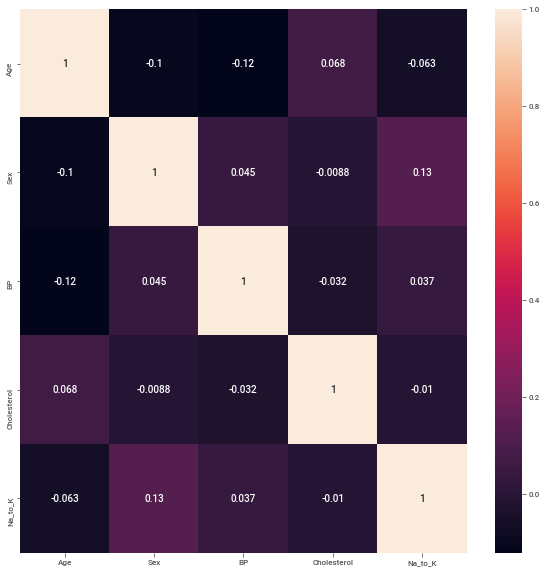

In [157]:
# Creating correlation Matrix

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

From the matrix, we can see that the there is almost no correlation between items. 
The correlation matrix shows that the sodium-potassium ratio and blood pressure have the strongest positive correlation on the prescribed drug.
BP has a very strong negative correlation to the prescribed drug.

#split dataset into train and test data

-  For this classifier we are setting the test_size to 0.2 meaning that 20% of all the data will be used for testing, which leaves 80% of the data as training data. 


## Cross Validation

In [158]:
#Create x and y variables
x = df.drop('Drug', axis=1).to_numpy()
y = df['Drug'].to_numpy()

#Create Train and Test Datasetsimport pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import svm


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale x variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.svm import SVC

In [173]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
#check accuracy of our model on the test data
knn1.score(x_test, y_test)

0.675

In [172]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.725 0.75  0.775 0.675 0.65 ]
cv_scores mean:0.715


<b>With cross-validation, our mean score is about 71.5%. </b>

## Classifiers and datasets 

In [159]:
#Base SVM Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))  


Estimator: SVM
[[ 4  0  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]
              precision    recall  f1-score   support

       drugA       1.00      0.80      0.89         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       0.95      1.00      0.97        18

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



As we can see from the Matrix above we have very high f1-scores with our lowest score being for drugA. From this we can see that our classifier has an accuracy of 97%

In [160]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC())])
pipeline.insert(0,pipe_svm)


# Set grid search params 

modelpara =[]

param_gridsvm = { 
           "clf__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "clf__gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "clf__C" : [1, 10, 100, 1000]}
modelpara.insert(0,param_gridsvm)     

Model Evaluation - Accuracy Score
Support Vector Machines 0.70 +/- 0.09




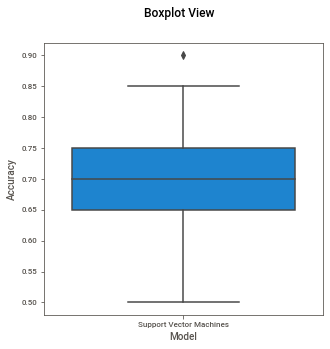

In [161]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Support Vector Machines',SVC(gamma='auto')))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [162]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2)
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Confusion Matrix and Report
    target_names=['drugY','drugX','drugA','drugB','drugC']
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names))     

In [163]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: SVC()

Best Parameters: {'clf__C': 100, 'clf__gamma': 0.1, 'clf__kernel': 'linear'}

 [[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 10  1]
 [ 0  0  0  0 18]]

               precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00         3
       drugA       1.00      1.00      1.00         3
       drugB       1.00      0.91      0.95        11
       drugC       0.95      1.00      0.97        18

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



## Conclsusion

Using optimization parameters i am abe to increase the accurucay of the model across all drug classes. We where able to increase the f1 score for drugA from 89% to 100% 